# Opening the black boxes of goodness tests

In [1]:
import numpy as np
import scipy.optimize as op
import scipy.stats as sts
from scipy.special import erf
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
%matplotlib notebook

In [3]:
def model_pdf(x, mu, sd):
    return 1./(np.sqrt(2.*np.pi)*sd)*np.exp(-np.power((x - mu)/sd, 2.)/2)

def model_cdf(x,mu,sd):
    return 0.5*(1 + erf((x-mu)/(sd*np.sqrt(2))))

def emperical_cdf(data, mode ='g'):
    x = np.sort(data)
    n = x.size
    if mode == 'g':
        y = np.arange(1, n+1) / n
    elif mode == 'l':
        y = np.arange(0, n) / n
    else:
        return np.nan
    return y


def my_ks_test(data,mu,sd):
    KS_up = (emperical_cdf(data, mode='g') - model_cdf(np.sort(data),mu,sd)).max()
    KS_low = (model_cdf(np.sort(data),mu,sd) - emperical_cdf(data, mode='l')).max()
    return np.max([KS_up, KS_low])


def loglike(theta, x):
    mu, sd = theta
    return np.log(model_pdf(x,mu,sd)).sum()

def negloglike(theta, x):
    mu, sd = theta
    return -np.log(model_pdf(x,mu,sd)).sum()

<IPython.core.display.Javascript object>


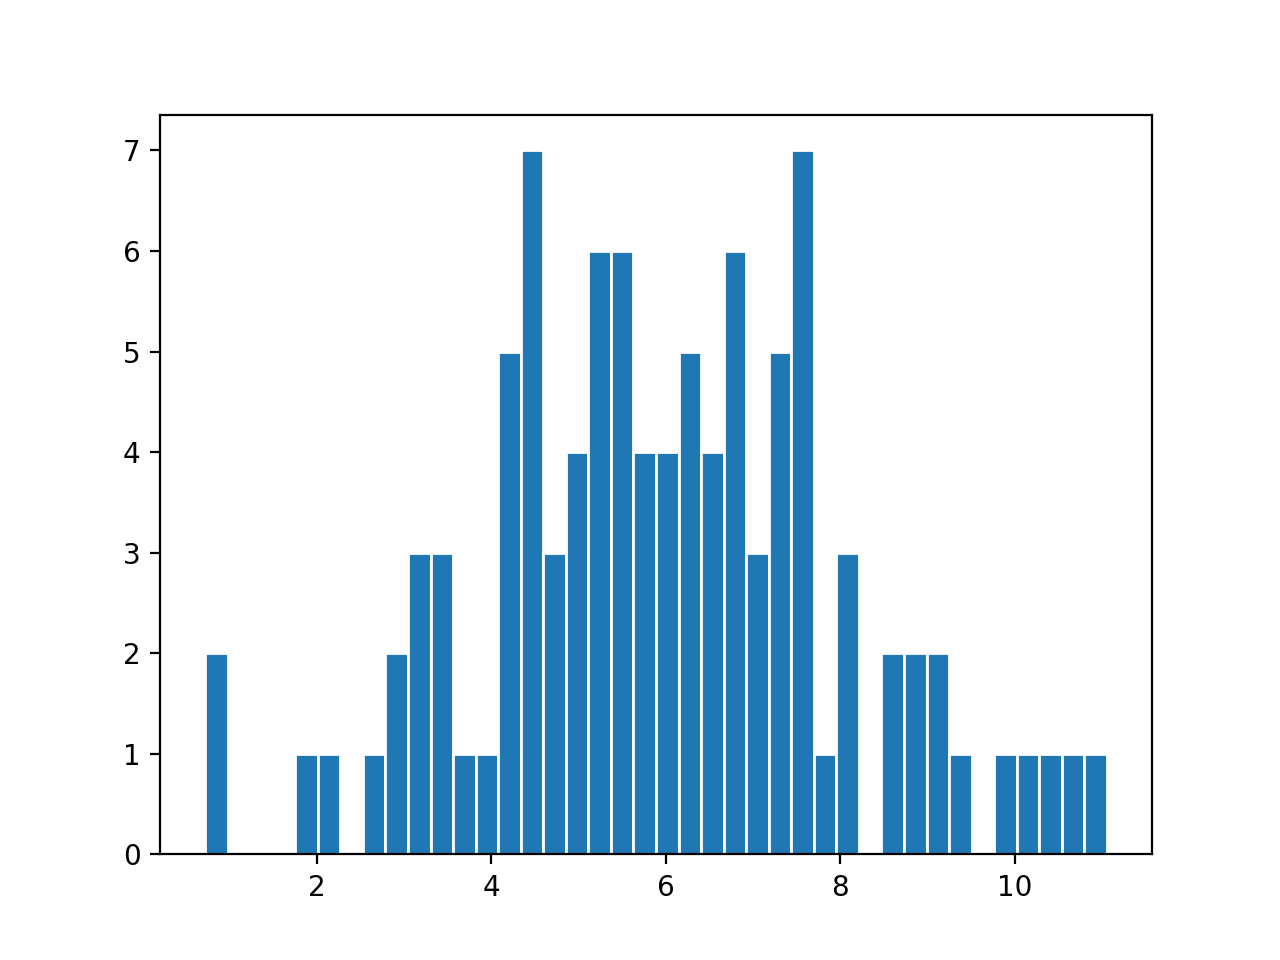

In [12]:
true_mu = 5.5
true_sd = 2.1
n_samp = 100

data = np.random.normal(true_mu,true_sd,n_samp)
plt.figure()
plt.hist(data,bins=40,edgecolor='w');

In [13]:
fit_results = op.minimize(negloglike, [5.0,2.0], args=(data), method='Nelder-Mead')
fit_results

 final_simplex: (array([[5.95731535, 2.0791674 ],
       [5.9572503 , 2.07921883],
       [5.95734215, 2.07923785]]), array([215.09164959, 215.09164961, 215.09164965]))
           fun: 215.0916495867784
       message: 'Optimization terminated successfully.'
          nfev: 57
           nit: 29
        status: 0
       success: True
             x: array([5.95731535, 2.0791674 ])

<IPython.core.display.Javascript object>


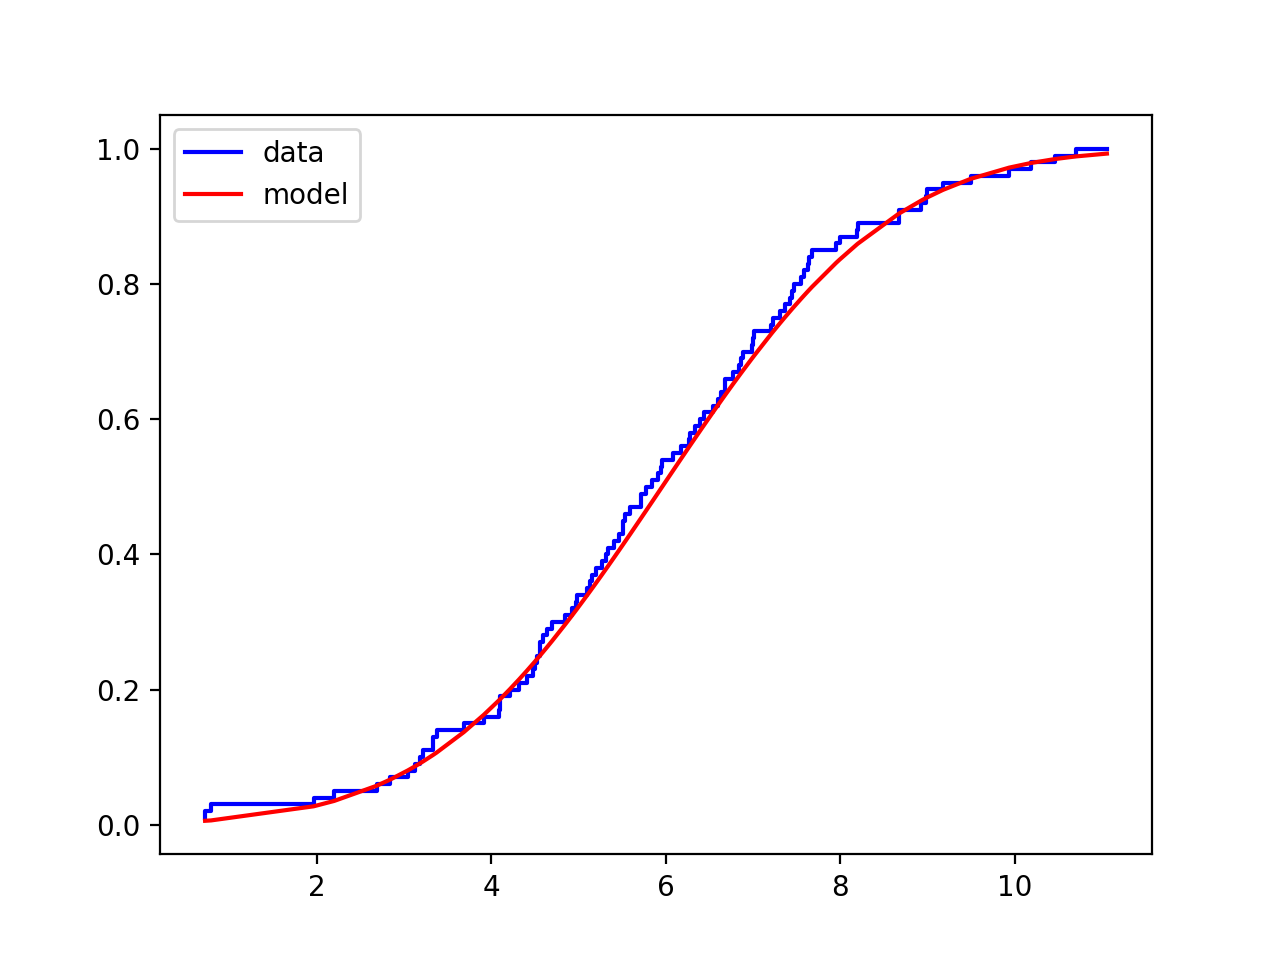

In [16]:
plt.figure()
plt.step(np.sort(data),emperical_cdf(data),label='data',color='b')
plt.plot(np.sort(data),model_cdf(np.sort(data),fit_results['x'][0],fit_results['x'][1]),label='model',color='r')
plt.legend()

In [17]:
print('My KS test:',my_ks_test(data,fit_results['x'][0],fit_results['x'][1]))
print('Scipy KS test (with my model CDF):',sts.kstest(data,model_cdf,args=(fit_results['x'][0],fit_results['x'][1]))[0])
print('Scipy KS test (with Scipy Normal CDF):',sts.kstest(data,'norm',args=(fit_results['x'][0],fit_results['x'][1]))[0])

My KS test: 0.044126187676342354
Scipy KS test (with my model CDF): 0.044126187676342354
Scipy KS test (with Scipy Normal CDF): 0.044126187676342354
